<a href="https://colab.research.google.com/github/AIEnthusiasts/PhoneticEmpiricalStudy/blob/main/empirical_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

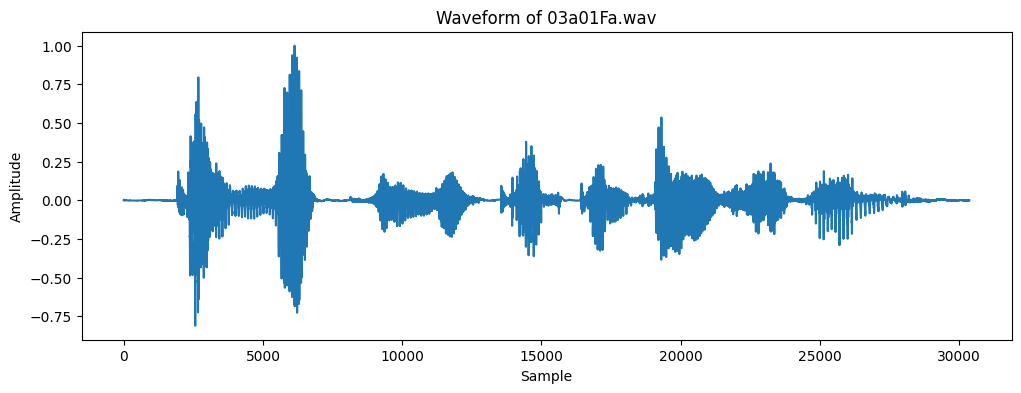

In [28]:
import os
import librosa
import matplotlib.pyplot as plt


wav_file = '03a01Fa.wav'


audio, sr = librosa.load(wav_file, sr=None)


plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title('Waveform of 03a01Fa.wav')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


In [84]:
import scipy.signal

def lpc(signal, order):


    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    R = autocorr[:order+1]
    a = np.ones(order+1)
    E = R[0]

    for k in range(1, order+1):
        if E == 0:
            a[k:] = 0
            break
        lambda_k = -np.sum(a[:k] * R[k:0:-1]) / E
        a[1:k+1] += lambda_k * a[k-1::-1]
        E *= 1 - lambda_k**2
    return a

def extract_formants(audio, sample_rate):

    pre_emphasis_audio = librosa.effects.preemphasis(audio)


    lpc_order = 2 + sample_rate // 1000
    a = lpc(pre_emphasis_audio, lpc_order)


    roots = np.roots(a)


    roots = [r for r in roots if np.imag(r) >= 0]


    angles = np.angle(roots)


    formant_frequencies = sorted(angles * (sample_rate / (2 * np.pi)))


    return formant_frequencies[:3]


file_name = '03a01Fa.wav'
audio, sample_rate = librosa.load(file_name)
formants = extract_formants(audio, sample_rate)
print("Extracted formants:", formants)



Extracted formants: [0.0, 0.0, 1200.6071428226778]


Logistic Regression Accuracy: 0.68
              precision    recall  f1-score   support

           A       0.53      0.62      0.57        13
           E       0.89      0.62      0.73        13
           F       0.59      0.67      0.62        15
           L       0.50      0.64      0.56        11
           N       0.60      0.67      0.63        18
           T       1.00      0.82      0.90        11
           W       0.83      0.73      0.78        26

    accuracy                           0.68       107
   macro avg       0.71      0.68      0.68       107
weighted avg       0.71      0.68      0.69       107



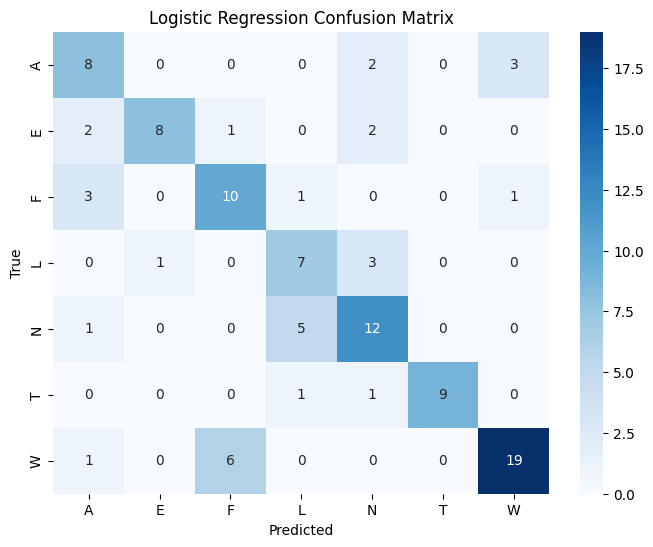

SVM (Linear) Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.59      0.77      0.67        13
           E       1.00      0.77      0.87        13
           F       0.56      0.67      0.61        15
           L       0.62      0.73      0.67        11
           N       0.76      0.72      0.74        18
           T       1.00      0.91      0.95        11
           W       0.86      0.73      0.79        26

    accuracy                           0.75       107
   macro avg       0.77      0.76      0.76       107
weighted avg       0.78      0.75      0.76       107



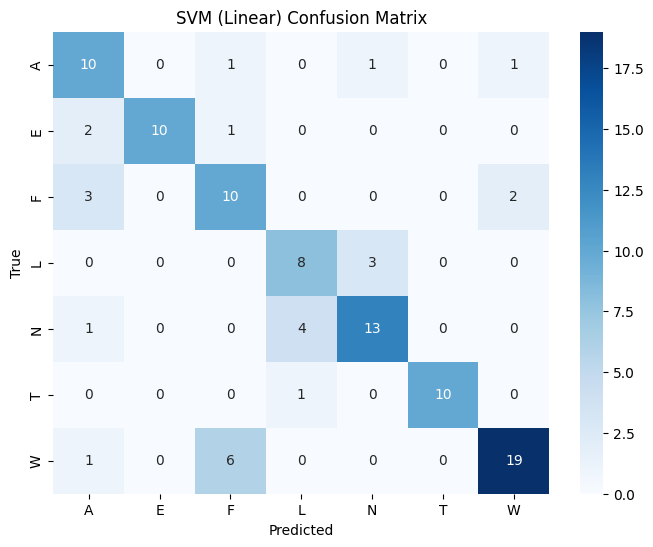

SVM (RBF) Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.77      0.77      0.77        13
           E       1.00      0.69      0.82        13
           F       0.62      0.67      0.65        15
           L       0.50      0.64      0.56        11
           N       0.67      0.67      0.67        18
           T       1.00      0.91      0.95        11
           W       0.81      0.85      0.83        26

    accuracy                           0.75       107
   macro avg       0.77      0.74      0.75       107
weighted avg       0.77      0.75      0.75       107



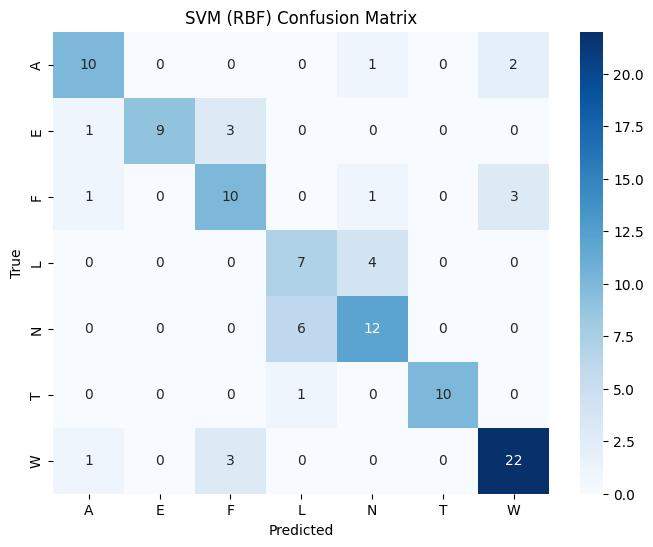

Random Forest Accuracy: 0.71
              precision    recall  f1-score   support

           A       0.62      0.62      0.62        13
           E       1.00      0.54      0.70        13
           F       0.62      0.53      0.57        15
           L       0.50      0.73      0.59        11
           N       0.76      0.72      0.74        18
           T       1.00      0.82      0.90        11
           W       0.72      0.88      0.79        26

    accuracy                           0.71       107
   macro avg       0.74      0.69      0.70       107
weighted avg       0.74      0.71      0.71       107



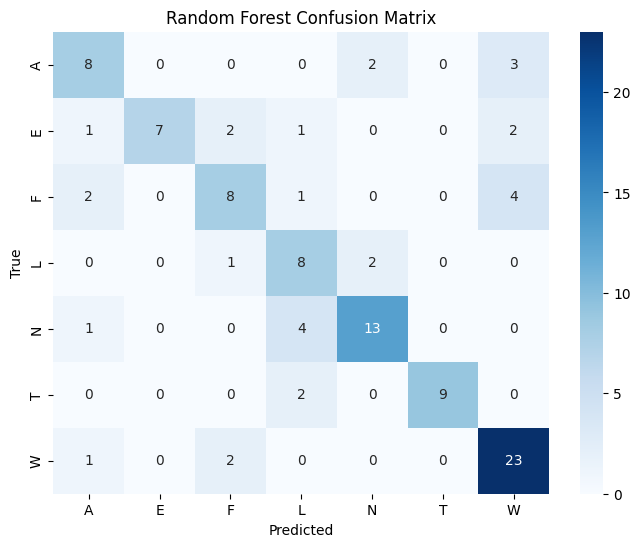

MLP Accuracy: 0.79
              precision    recall  f1-score   support

           A       0.85      0.85      0.85        13
           E       1.00      0.69      0.82        13
           F       0.63      0.80      0.71        15
           L       0.53      0.82      0.64        11
           N       0.75      0.67      0.71        18
           T       1.00      0.82      0.90        11
           W       0.92      0.85      0.88        26

    accuracy                           0.79       107
   macro avg       0.81      0.78      0.79       107
weighted avg       0.82      0.79      0.79       107



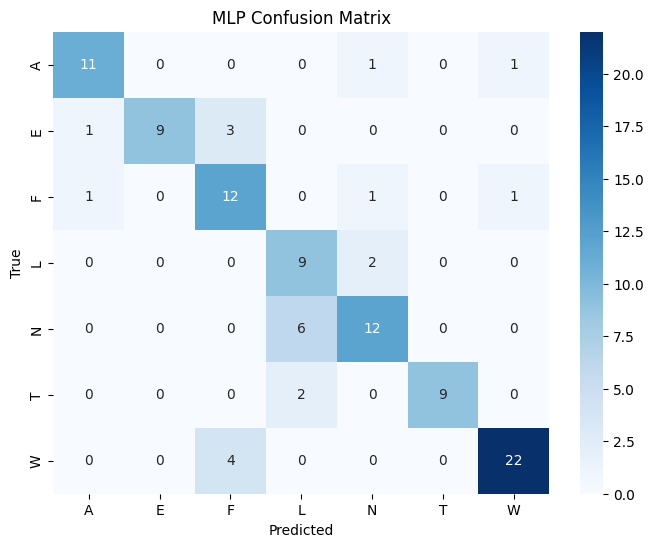

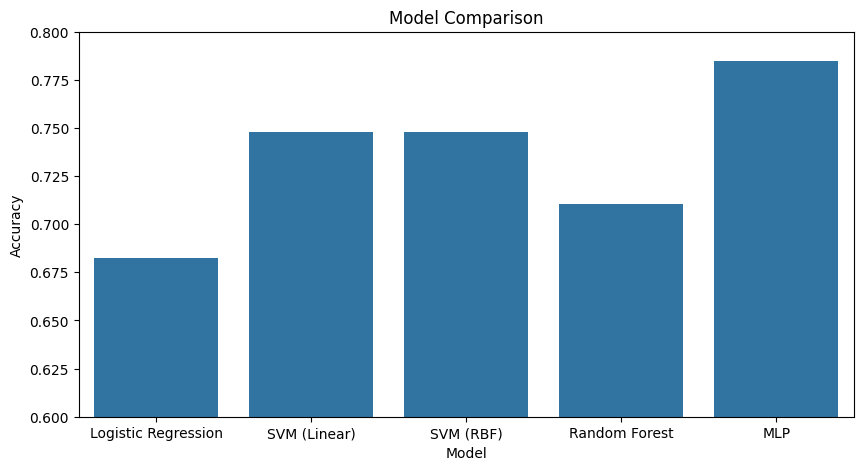

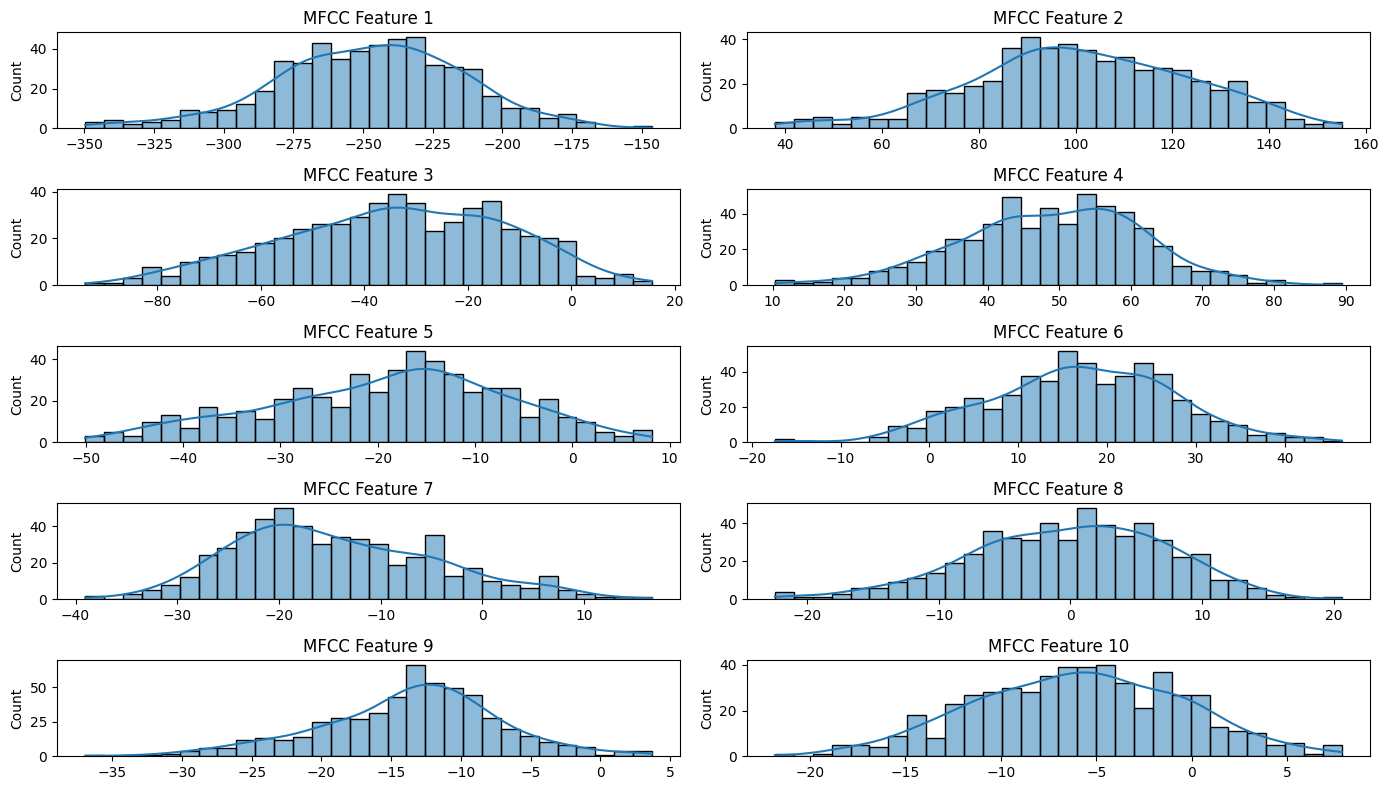

In [53]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns



def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)

    return mfccs_scaled


audio_dir = '/content/wav'
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

features = []
labels = []


for file_name in audio_files:
    file_path = os.path.join(audio_dir, file_name)
    emotion_label = file_name[-6]
    feature = extract_features(file_path)
    features.append(feature)
    labels.append(emotion_label)


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


X = np.array(features)
y = np.array(labels_encoded)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return accuracy


logistic_regression = LogisticRegression(max_iter=1000)
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
random_forest = RandomForestClassifier(n_estimators=100)
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500)

models = [logistic_regression, svm_linear, svm_rbf, random_forest, mlp]
model_names = ['Logistic Regression', 'SVM (Linear)', 'SVM (RBF)', 'Random Forest', 'MLP']

accuracies = []
for model, name in zip(models, model_names):
    accuracy = train_and_evaluate(model, name)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.6, 0.8)  # Set the Y-axis limit to start from 0.6
plt.show()


plt.figure(figsize=(14, 8))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    sns.histplot(X[:, i-1], kde=True, bins=30)
    plt.title(f'MFCC Feature {i}')
plt.tight_layout()
plt.show()


Results for MFCC features:
Logistic Regression Accuracy: 0.68
              precision    recall  f1-score   support

           A       0.53      0.62      0.57        13
           E       0.89      0.62      0.73        13
           F       0.59      0.67      0.62        15
           L       0.50      0.64      0.56        11
           N       0.60      0.67      0.63        18
           T       1.00      0.82      0.90        11
           W       0.83      0.73      0.78        26

    accuracy                           0.68       107
   macro avg       0.71      0.68      0.68       107
weighted avg       0.71      0.68      0.69       107



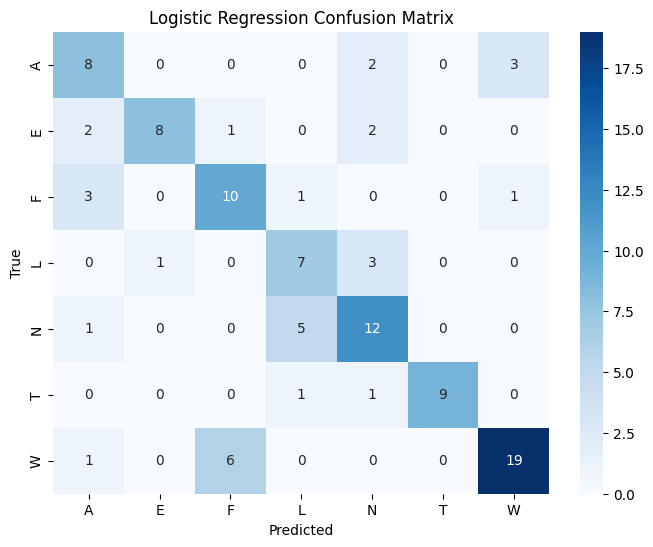

SVM (Linear) Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.59      0.77      0.67        13
           E       1.00      0.77      0.87        13
           F       0.56      0.67      0.61        15
           L       0.62      0.73      0.67        11
           N       0.76      0.72      0.74        18
           T       1.00      0.91      0.95        11
           W       0.86      0.73      0.79        26

    accuracy                           0.75       107
   macro avg       0.77      0.76      0.76       107
weighted avg       0.78      0.75      0.76       107



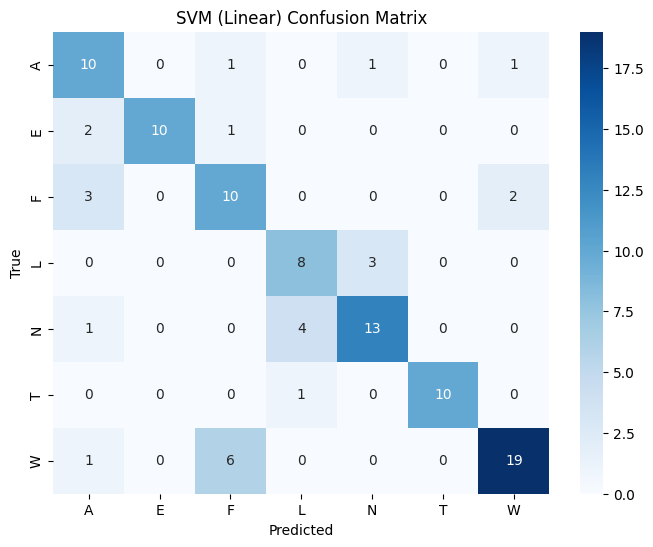

SVM (RBF) Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.77      0.77      0.77        13
           E       1.00      0.69      0.82        13
           F       0.62      0.67      0.65        15
           L       0.50      0.64      0.56        11
           N       0.67      0.67      0.67        18
           T       1.00      0.91      0.95        11
           W       0.81      0.85      0.83        26

    accuracy                           0.75       107
   macro avg       0.77      0.74      0.75       107
weighted avg       0.77      0.75      0.75       107



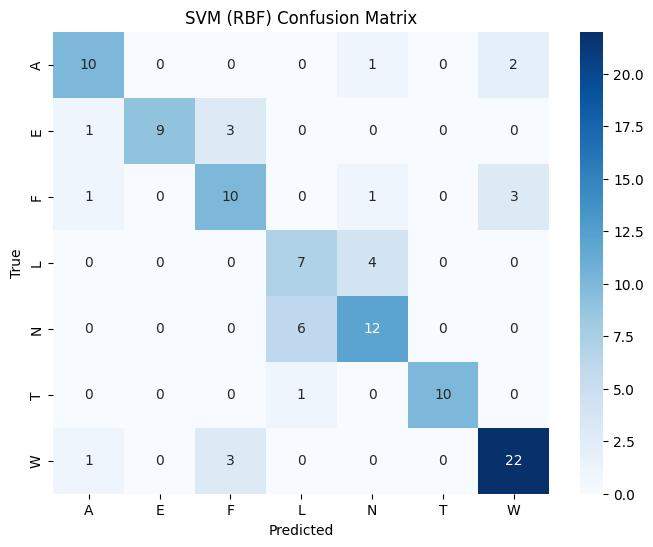

Random Forest Accuracy: 0.70
              precision    recall  f1-score   support

           A       0.73      0.62      0.67        13
           E       1.00      0.54      0.70        13
           F       0.58      0.47      0.52        15
           L       0.50      0.64      0.56        11
           N       0.67      0.78      0.72        18
           T       1.00      0.73      0.84        11
           W       0.71      0.92      0.80        26

    accuracy                           0.70       107
   macro avg       0.74      0.67      0.69       107
weighted avg       0.73      0.70      0.70       107



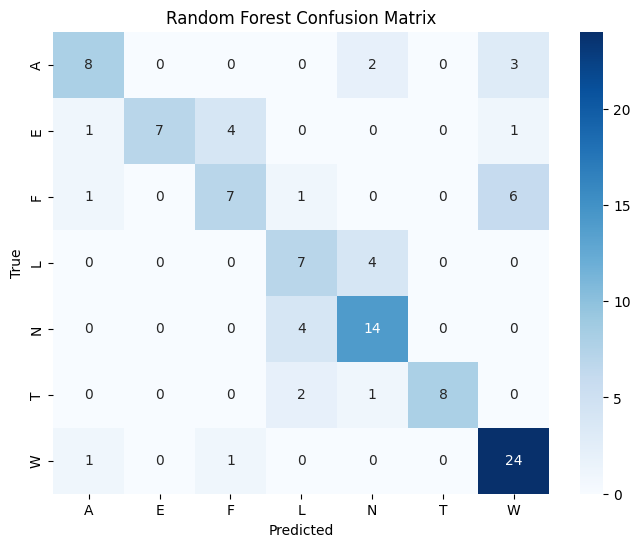

MLP Accuracy: 0.79
              precision    recall  f1-score   support

           A       0.77      0.77      0.77        13
           E       1.00      0.85      0.92        13
           F       0.71      0.80      0.75        15
           L       0.58      0.64      0.61        11
           N       0.73      0.89      0.80        18
           T       1.00      0.73      0.84        11
           W       0.83      0.77      0.80        26

    accuracy                           0.79       107
   macro avg       0.80      0.78      0.78       107
weighted avg       0.80      0.79      0.79       107



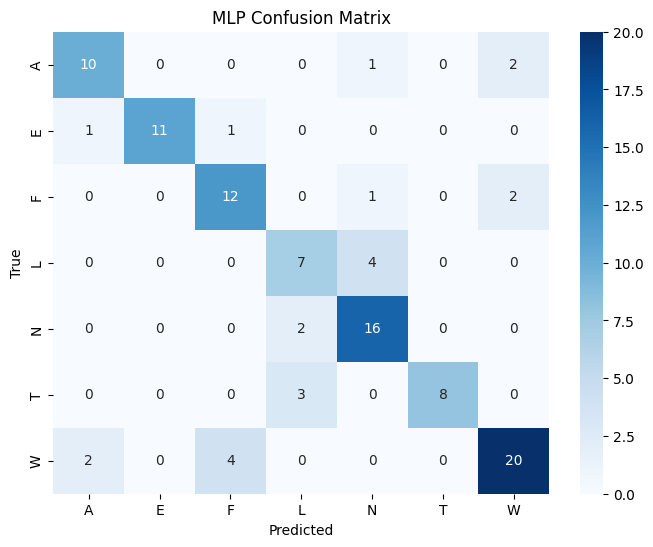

Results for MFCC + Phonetic features:
Logistic Regression Accuracy: 0.72
              precision    recall  f1-score   support

           A       0.53      0.62      0.57        13
           E       0.90      0.69      0.78        13
           F       0.62      0.67      0.65        15
           L       0.58      0.64      0.61        11
           N       0.63      0.67      0.65        18
           T       1.00      1.00      1.00        11
           W       0.83      0.77      0.80        26

    accuracy                           0.72       107
   macro avg       0.73      0.72      0.72       107
weighted avg       0.73      0.72      0.72       107



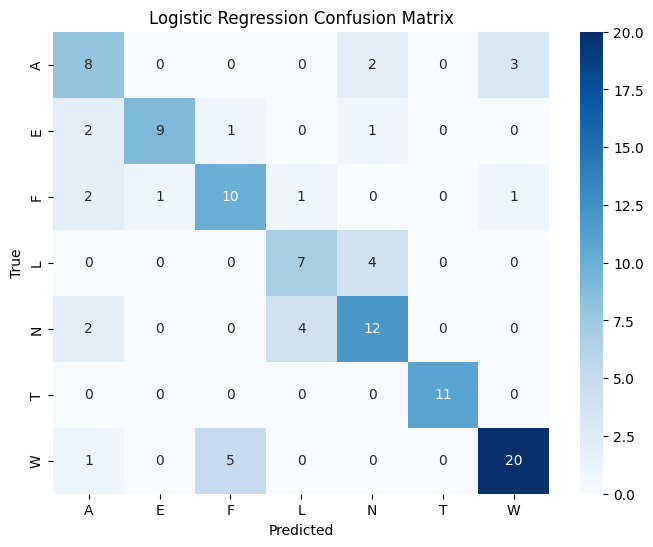

SVM (Linear) Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.50      0.69      0.58        13
           E       0.92      0.85      0.88        13
           F       0.64      0.60      0.62        15
           L       0.67      0.73      0.70        11
           N       0.81      0.72      0.76        18
           T       1.00      0.82      0.90        11
           W       0.81      0.81      0.81        26

    accuracy                           0.75       107
   macro avg       0.76      0.74      0.75       107
weighted avg       0.77      0.75      0.75       107



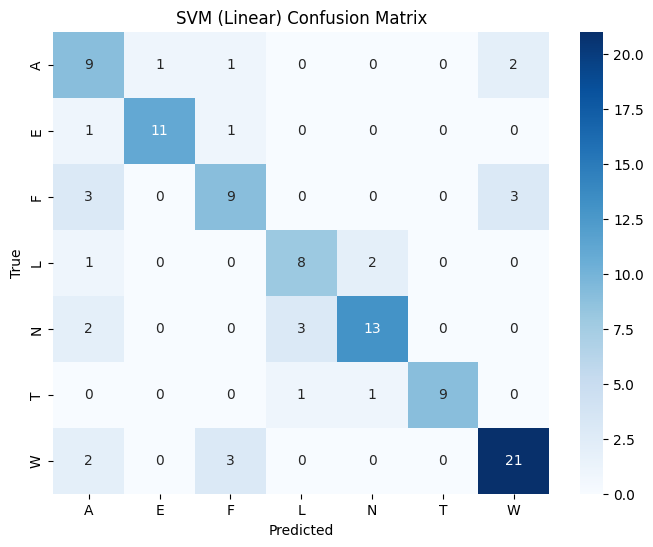

SVM (RBF) Accuracy: 0.74
              precision    recall  f1-score   support

           A       0.69      0.69      0.69        13
           E       1.00      0.77      0.87        13
           F       0.67      0.67      0.67        15
           L       0.46      0.55      0.50        11
           N       0.63      0.67      0.65        18
           T       1.00      0.91      0.95        11
           W       0.81      0.85      0.83        26

    accuracy                           0.74       107
   macro avg       0.75      0.73      0.74       107
weighted avg       0.75      0.74      0.74       107



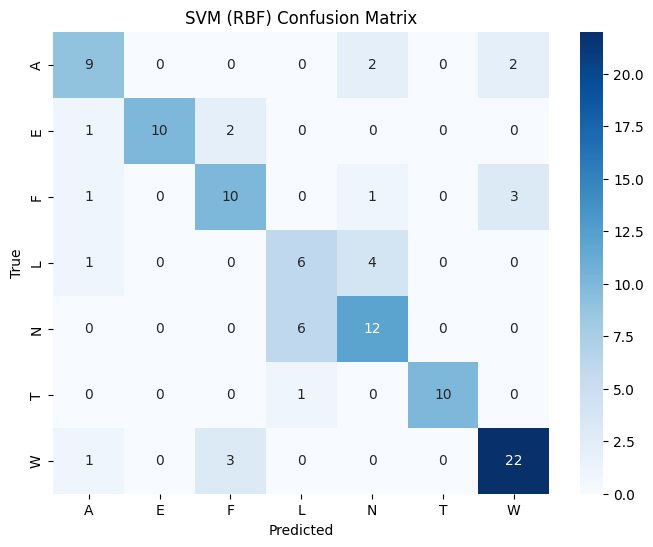

Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           A       0.64      0.69      0.67        13
           E       1.00      0.62      0.76        13
           F       0.64      0.47      0.54        15
           L       0.69      0.82      0.75        11
           N       0.68      0.83      0.75        18
           T       1.00      0.73      0.84        11
           W       0.77      0.92      0.84        26

    accuracy                           0.75       107
   macro avg       0.78      0.73      0.74       107
weighted avg       0.77      0.75      0.74       107



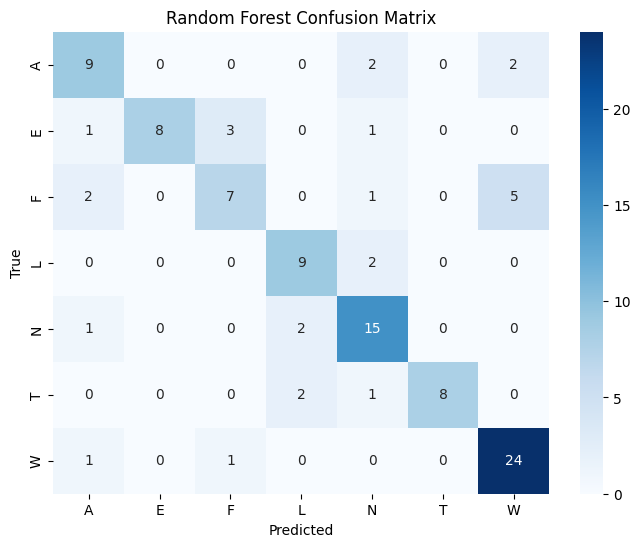

MLP Accuracy: 0.72
              precision    recall  f1-score   support

           A       0.67      0.77      0.71        13
           E       0.89      0.62      0.73        13
           F       0.56      0.67      0.61        15
           L       0.64      0.64      0.64        11
           N       0.70      0.78      0.74        18
           T       0.90      0.82      0.86        11
           W       0.79      0.73      0.76        26

    accuracy                           0.72       107
   macro avg       0.73      0.72      0.72       107
weighted avg       0.73      0.72      0.72       107



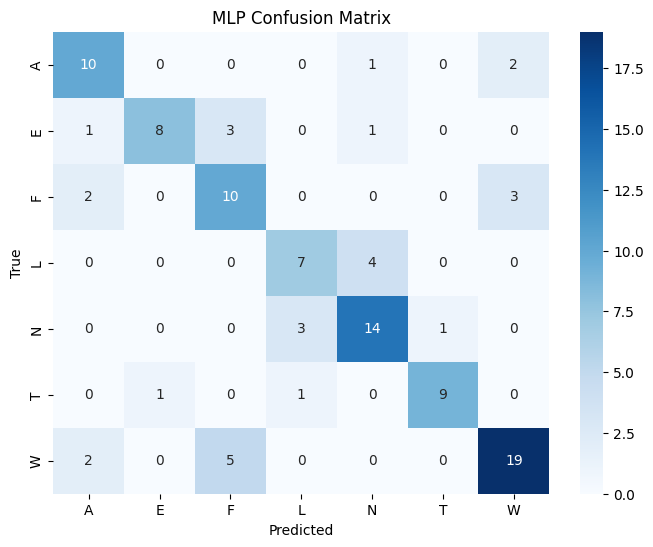

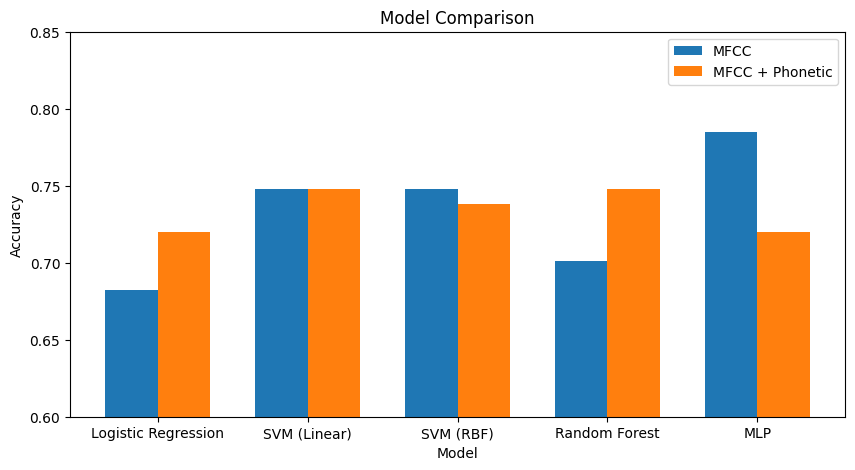

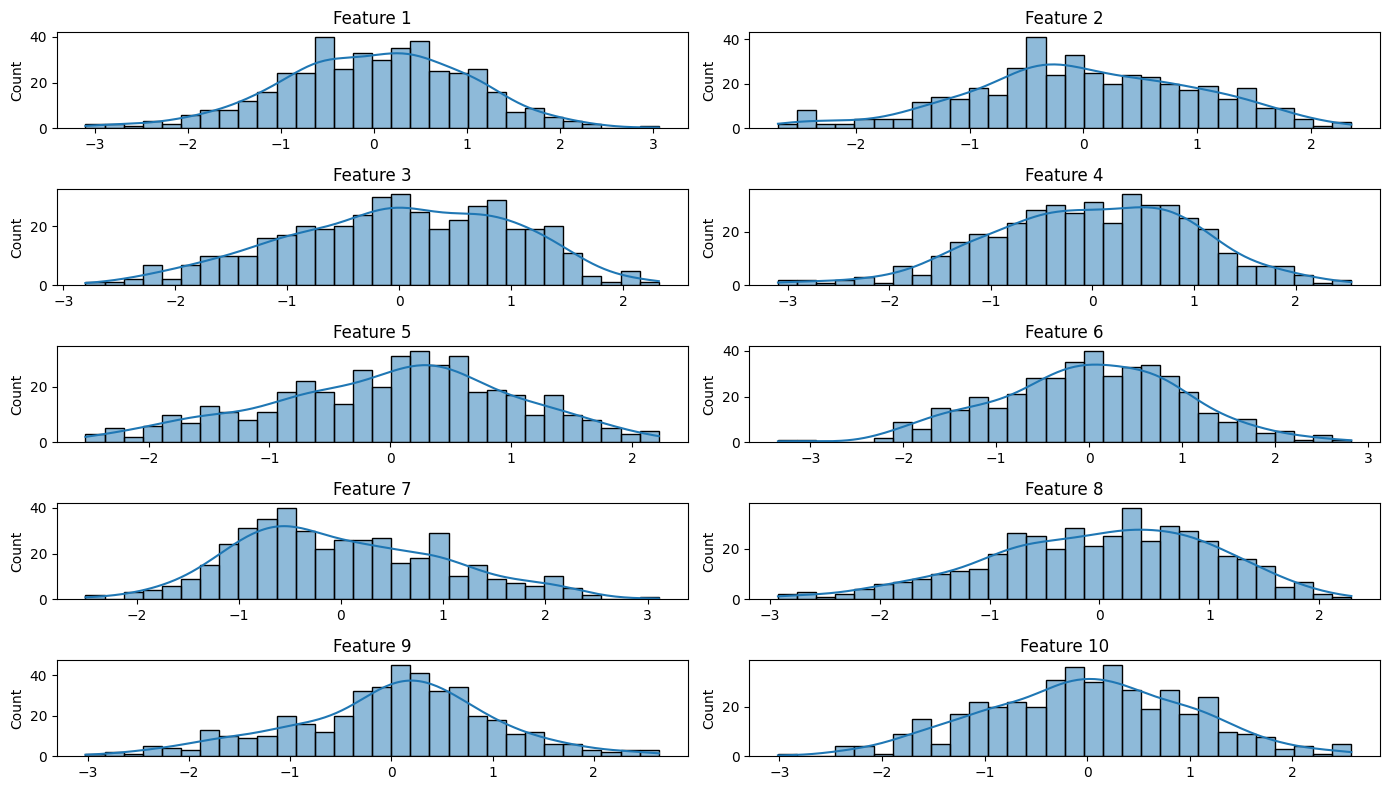

In [97]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns



def extract_mfcc_features(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

def extract_mfcc_phonetic_features(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)


    pitch, _ = librosa.core.piptrack(y=audio, sr=sample_rate)
    pitch_mean = np.mean(pitch[pitch > 0])

    rmse = librosa.feature.rms(y=audio)
    rmse_scaled = np.mean(rmse)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
    spectral_rolloff_scaled = np.mean(spectral_rolloff)

    intensity = np.mean(librosa.amplitude_to_db(audio))

    return np.concatenate((mfccs_scaled, [pitch_mean,  rmse_scaled, spectral_rolloff_scaled, intensity]))


audio_dir = '/content/wav'
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]


def prepare_dataset(feature_extraction_func):
    features = []
    labels = []
    for file_name in audio_files:
        file_path = os.path.join(audio_dir, file_name)
        emotion_label = file_name[-6]
        feature = feature_extraction_func(file_path)
        features.append(feature)
        labels.append(emotion_label)


    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)


    X = np.array(features)
    y = np.array(labels_encoded)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, label_encoder


def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, label_encoder):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return accuracy


X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc, label_encoder_mfcc = prepare_dataset(extract_mfcc_features)
X_train_mfcc_phonetic, X_test_mfcc_phonetic, y_train_mfcc_phonetic, y_test_mfcc_phonetic, label_encoder_mfcc_phonetic = prepare_dataset(extract_mfcc_phonetic_features)


models = [
    (LogisticRegression(max_iter=1000), 'Logistic Regression'),
    (SVC(kernel='linear'), 'SVM (Linear)'),
    (SVC(kernel='rbf'), 'SVM (RBF)'),
    (RandomForestClassifier(n_estimators=100), 'Random Forest'),
    (MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500), 'MLP')
]

print("Results for MFCC features:")
accuracies_mfcc = []
for model, name in models:
    accuracy = train_and_evaluate(model, name, X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc, label_encoder_mfcc)
    accuracies_mfcc.append(accuracy)

print("Results for MFCC + Phonetic features:")
accuracies_mfcc_phonetic = []
for model, name in models:
    accuracy = train_and_evaluate(model, name, X_train_mfcc_phonetic, X_test_mfcc_phonetic, y_train_mfcc_phonetic, y_test_mfcc_phonetic, label_encoder_mfcc_phonetic)
    accuracies_mfcc_phonetic.append(accuracy)


plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, accuracies_mfcc, bar_width, label='MFCC')
plt.bar(index + bar_width, accuracies_mfcc_phonetic, bar_width, label='MFCC + Phonetic')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(index + bar_width / 2, [name for _, name in models])
plt.ylim(0.6, 0.85)  # Set the Y-axis limit to start from 0.6
plt.legend()
plt.show()



plt.figure(figsize=(14, 8))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    sns.histplot(X_train_mfcc_phonetic[:, i-1], kde=True, bins=30)
    plt.title(f'Feature {i}')
plt.tight_layout()
plt.show()


In [98]:
'''



import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal

def extract_mfcc_features(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

def lpc(signal, order):
    """Compute LPC coefficients."""
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    R = autocorr[:order+1]
    a = np.ones(order+1)
    E = R[0]

    for k in range(1, order+1):
        if E == 0:
            a[k:] = 0
            break
        lambda_k = -np.sum(a[:k] * R[k:0:-1]) / E
        a[1:k+1] += lambda_k * a[k-1::-1]
        E *= 1 - lambda_k**2
    return a

def extract_formants(audio, sample_rate):
    pre_emphasis_audio = librosa.effects.preemphasis(audio)
    lpc_order = 2 + sample_rate // 1000
    a = lpc(pre_emphasis_audio, lpc_order)
    roots = np.roots(a)
    roots = [r for r in roots if np.imag(r) >= 0]
    angles = np.angle(roots)
    formant_frequencies = sorted(angles * (sample_rate / (2 * np.pi)))
    return formant_frequencies[:3]  # Returning the first three formants

def extract_mfcc_phonetic_features(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)

    pitch, _ = librosa.core.piptrack(y=audio, sr=sample_rate)
    pitch_mean = np.mean(pitch[pitch > 0])

    rmse = librosa.feature.rms(y=audio)
    rmse_scaled = np.mean(rmse)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
    spectral_rolloff_scaled = np.mean(spectral_rolloff)

    intensity = np.mean(librosa.amplitude_to_db(audio))

    formants = extract_formants(audio, sample_rate)

    return np.concatenate((mfccs_scaled, [pitch_mean, rmse_scaled, spectral_rolloff_scaled, intensity], formants))

audio_dir = '/content/wav'
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

def prepare_dataset(feature_extraction_func):
    features = []
    labels = []
    for file_name in audio_files:
        file_path = os.path.join(audio_dir, file_name)
        emotion_label = file_name[-6]
        feature = feature_extraction_func(file_path)
        features.append(feature)
        labels.append(emotion_label)

    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    X = np.array(features)
    y = np.array(labels_encoded)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, label_encoder

def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, label_encoder):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return accuracy

X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc, label_encoder_mfcc = prepare_dataset(extract_mfcc_features)
X_train_mfcc_phonetic, X_test_mfcc_phonetic, y_train_mfcc_phonetic, y_test_mfcc_phonetic, label_encoder_mfcc_phonetic = prepare_dataset(extract_mfcc_phonetic_features)

models = [
    (LogisticRegression(max_iter=1000), 'Logistic Regression'),
    (SVC(kernel='linear'), 'SVM (Linear)'),
    (SVC(kernel='rbf'), 'SVM (RBF)'),
    (RandomForestClassifier(n_estimators=100), 'Random Forest'),
    (MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500), 'MLP')
]

print("Results for MFCC features:")
accuracies_mfcc = []
for model, name in models:
    accuracy = train_and_evaluate(model, name, X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc, label_encoder_mfcc)
    accuracies_mfcc.append(accuracy)

print("Results for MFCC + Phonetic features:")
accuracies_mfcc_phonetic = []
for model, name in models:
    accuracy = train_and_evaluate(model, name, X_train_mfcc_phonetic, X_test_mfcc_phonetic, y_train_mfcc_phonetic, y_test_mfcc_phonetic, label_encoder_mfcc_phonetic)
    accuracies_mfcc_phonetic.append(accuracy)

plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, accuracies_mfcc, bar_width, label='MFCC')
plt.bar(index + bar_width, accuracies_mfcc_phonetic, bar_width, label='MFCC + Phonetic')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(index + bar_width / 2, [name for _, name in models])
plt.ylim(0.6, 0.85)  # Set the Y-axis limit to start from 0.6
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    sns.histplot(X_train_mfcc_phonetic[:, i-1], kde=True, bins=30)
    plt.title(f'Feature {i}')
plt.tight_layout()
plt.show()
'''


'\n\n\n\nimport os\nimport librosa\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neural_network import MLPClassifier\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport scipy.signal\n\ndef extract_mfcc_features(file_name):\n    audio, sample_rate = librosa.load(file_name)\n    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)\n    mfccs_scaled = np.mean(mfccs.T, axis=0)\n    return mfccs_scaled\n\ndef lpc(signal, order):\n    """Compute LPC coefficients."""\n    autocorr = np.correlate(signal, signal, mode=\'full\')\n    autocorr = autocorr[len(autocorr)//2:]\n    R = autocorr[:order+1]\n    a = np.ones(order+1)\n    E